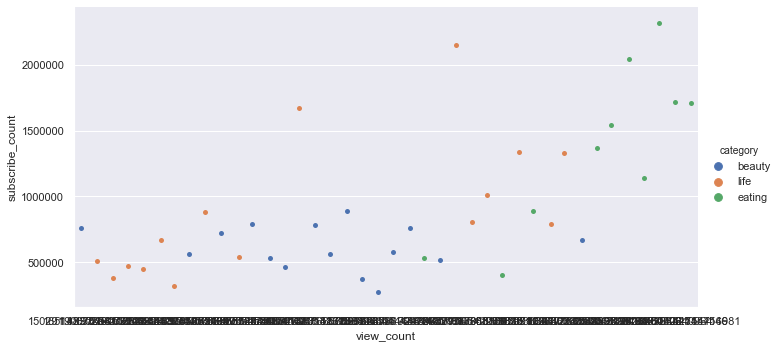

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("csv,xlsx파일 모음/"+"파뿌리.csv",encoding="utf-8")





import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
# subscribe_count와 category로 그룹화된 데이터프레임의 view_count의 평균
sub_cat_view = df.groupby(["subscribe_count","category"],as_index=False)["view_count"].mean()

# 경향성 시각화
sns.catplot(data=sub_cat_view,x="view_count",y="subscribe_count",hue="category",aspect=2)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:

train_data = df.drop(["subscribe_count","category"],axis=1)
target_data = df["subscribe_count"]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data)

In [5]:
from sklearn.ensemble import RandomForestRegressor

# 분야별로 경향이나 추이가 다르기 때문에 분야를 기준으로 데이터를 나누어야 한다. 

# beauty 
beauty_data = df[df["category"] == "beauty"]
train_data_beauty = beauty_data.drop(["subscribe_count","category"],axis=1)
test_data_beauty = beauty_data["subscribe_count"]

x_train_beauty, x_test_beauty,y_train_beauty,y_test_beauty = train_test_split(train_data_beauty,test_data_beauty)

# eating
eating_data = df[df["category"] == "eating"]
train_data_eating = eating_data.drop(["subscribe_count","category"],axis=1)
test_data_eating = eating_data["subscribe_count"]

x_train_eating,x_test_eating,y_train_eating,y_test_eating = train_test_split(train_data_eating,test_data_eating)

#life
life_data = df[df["category"] == "life"]
train_data_life = life_data.drop(["subscribe_count","category"],axis=1)
test_data_life = life_data["subscribe_count"]

x_train_life,x_test_life,y_train_life,y_test_life = train_test_split(train_data_life,test_data_life)


In [6]:
# LinearRegression
from sklearn.linear_model import LinearRegression

linear_beauty = LinearRegression().fit(x_train_beauty,y_train_beauty)
linear_eating = LinearRegression().fit(x_train_eating,y_train_eating)
linear_life = LinearRegression().fit(x_train_life,y_train_life)

print("Beauty(Linear) : ")
print("traing set accuracy : ",linear_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",linear_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(Linear) : ")
print("traing set accuracy : ",linear_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",linear_eating.score(x_test_eating,y_test_eating))

print("Life(Linear) : ")
print("traing set accuracy : ",linear_life.score(x_train_life,y_train_life))
print("test set accuracy : ",linear_life.score(x_test_life,y_test_life))
print()

Beauty(Linear) : 
traing set accuracy :  0.17456274244648096
test set accuracy :  0.056736818754995366
Eating(Linear) : 
traing set accuracy :  0.4559457008319192
test set accuracy :  -0.19223283409715708
Life(Linear) : 
traing set accuracy :  0.4093430887881935
test set accuracy :  0.4137233382935971



In [7]:
# Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_beauty = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_beauty,y_train_beauty)
poly_eating = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_eating,y_train_eating)
poly_life = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_life,y_train_life)


print("Beauty(Polynomial) : ")
print("traing set accuracy : ",poly_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",poly_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(Polynomial) : ")
print("traing set accuracy : ",poly_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",poly_eating.score(x_test_eating,y_test_eating))

print("Life(Polynomial) : ")
print("traing set accuracy : ",poly_life.score(x_train_life,y_train_life))
print("test set accuracy : ",poly_life.score(x_test_life,y_test_life))
print()

Beauty(Polynomial) : 
traing set accuracy :  0.15584151861738016
test set accuracy :  -1.1236811417663053
Eating(Polynomial) : 
traing set accuracy :  0.7987635781400971
test set accuracy :  -10.81297482808163
Life(Polynomial) : 
traing set accuracy :  0.6207689202636085
test set accuracy :  0.5932282379482983



In [8]:
# RandomForest
forest_beauty = RandomForestRegressor().fit(x_train_beauty,y_train_beauty)
forest_eating = RandomForestRegressor().fit(x_train_eating,y_train_eating)
forest_life = RandomForestRegressor().fit(x_train_life,y_train_life)

print("Beauty(RandomForest) : ")
print("traing set accuracy : ",forest_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",forest_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(RandomForest) : ")
print("traing set accuracy : ",forest_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",forest_eating.score(x_test_eating,y_test_eating))

print("Life(RandomForest) : ")
print("traing set accuracy : ",forest_life.score(x_train_life,y_train_life))
print("test set accuracy : ",forest_life.score(x_test_life,y_test_life))
print()

Beauty(RandomForest) : 
traing set accuracy :  0.8811589763927367
test set accuracy :  0.235127250502573
Eating(RandomForest) : 
traing set accuracy :  0.9916930319076898
test set accuracy :  0.9306847278414432
Life(RandomForest) : 
traing set accuracy :  0.9754501554402197
test set accuracy :  0.8881901236496716



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor를 사용하는것이 가장 무난하다.
왜냐하면 Polynomial은 new data에 대해 -의 정확도를 보이기 때문에 제외되고,
LinearRegression모델은 "일상" 데이터에 대해 (-)가 나오는 경우가 종종 있었다.
하지만 RandomForestRegressor는 (-)의 정확도가 나타나지 않았다.
